In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from matplotlib.pylab import rcParams
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


LSTM model

In [78]:
file = 'drive/My Drive/DS 340W/Project/BTC-USD_table.csv'
data = pd.read_csv(file)

In [79]:
print(data.shape)
data.head()

(366, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,4/20/2021,55681.79297,57062.14844,53448.04688,56473.03125,56473.03125,6.784932e+10
1,4/21/2021,56471.12891,56757.97266,53695.46875,53906.08984,53906.08984,5.492661e+10
2,4/22/2021,53857.10547,55410.23047,50583.81250,51762.27344,51762.27344,7.479863e+10
3,4/23/2021,51739.80859,52120.79297,47714.66406,51093.65234,51093.65234,8.666867e+10
4,4/24/2021,51143.22656,51167.56250,48805.28516,50050.86719,50050.86719,4.901449e+10


In [80]:
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

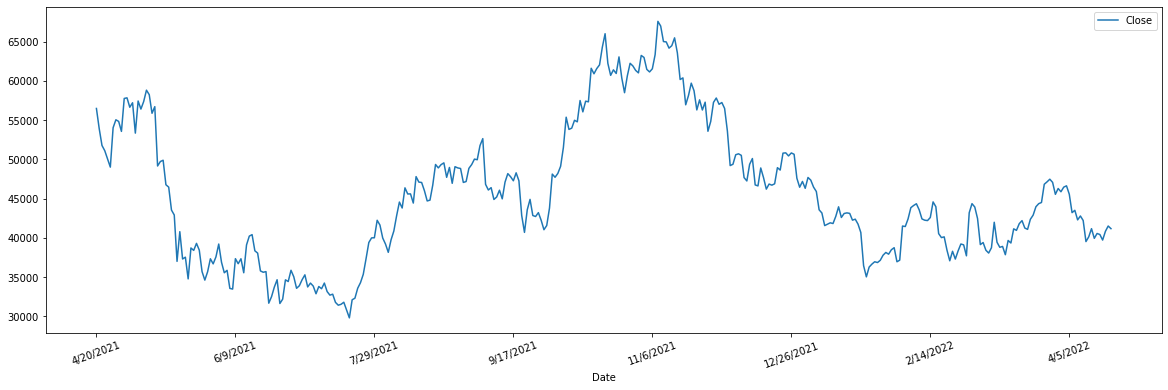

In [81]:
# Plotting the price
%matplotlib inline
data.plot(x='Date', y='Close', kind='line', figsize=(20,6), rot=20)

In [82]:
# Extracting the closing prices of each day
all_data = data[['Close']].values
print(all_data[0:5])
 
sc = MinMaxScaler()
 
DataScaler = sc.fit(all_data)
x = DataScaler.transform(all_data)
 
print('### After Normalization ###')
x[0:5]

[[56473.03125]
 [53906.08984]
 [51762.27344]
 [51093.65234]
 [50050.86719]]
### After Normalization ###


array([[0.70619837],
       [0.638217  ],
       [0.58144142],
       [0.56373405],
       [0.53611753]])

In [83]:
# split into samples
x_samples = list()
y_samples = list()
 
NumberOfRows = len(x)

# Set number of days used for price prediction
time_steps = 10  
 
# Iterate through the values to create combinations
for i in rangetime_steps , NumberOfRows , 1):
    x_sample = x[i-time_steps:i]
    y_sample = x[i]
    x_samples.append(x_sample)
    y_samples.append(y_sample)
 
# Reshape the Input as a 3D
x_data = np.array(x_samples)
x_data = x_data.reshape(x_data.shape[0],x_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(x_data.shape)
y_data = np.array(y_samples)
y_data = y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(356, 10, 1)

#### Output Data shape ####
(356, 1)


In [84]:
# Number of testing data records
TestingRecords = 50
 
# Split the data into train and test
x_train = x_data[:-TestingRecords]
x_test = x_data[-TestingRecords:]
y_train = y_data[:-TestingRecords]
y_test = y_data[-TestingRecords:]
 
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(x_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(x_test.shape)
print(y_test.shape)


#### Training Data shape ####
(306, 10, 1)
(306, 1)

#### Testing Data shape ####
(50, 10, 1)
(50, 1)


In [85]:
# Visualize the input and output being sent to the LSTM model
for inp, out in zip(x_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.70619837]
 [0.638217  ]
 [0.58144142]
 [0.56373405]
 [0.53611753]
 [0.50839964]
 [0.64128018]
 [0.66806453]
 [0.66254501]
 [0.62892183]] -- [0.74002152]
[[0.638217  ]
 [0.58144142]
 [0.56373405]
 [0.53611753]
 [0.50839964]
 [0.64128018]
 [0.66806453]
 [0.66254501]
 [0.62892183]
 [0.74002152]] -- [0.74208392]


In [86]:
# Defining Input shapes for LSTM
time_steps = x_train.shape[1]
total_features = x_train.shape[2]
print("Number of time steps:", time_steps)
print("Number of features:", total_features)

Number of time steps: 10
Number of features: 1


In [87]:
# Initialize the RNN
regressor = Sequential()
 
# Add the First input hidden layer and the LSTM layer
regressor.add(LSTM(units = 25, activation = 'relu', input_shape = (time_steps, total_features), return_sequences=True))
 
# Add hidden layers
regressor.add(LSTM(units = 6, activation = 'relu', input_shape = (time_steps, total_features), return_sequences=True))
regressor.add(LSTM(units = 6, activation = 'relu', input_shape = (time_steps, total_features), return_sequences=True))
regressor.add(LSTM(units = 6, activation = 'relu', input_shape = (time_steps, total_features), return_sequences=True))
#regressor.add(LSTM(units = 16, activation = 'relu', input_shape = (time_steps, total_features), return_sequences=True))
#regressor.add(LSTM(units = 16, activation = 'relu', input_shape = (time_steps, total_features), return_sequences=True))
#regressor.add(LSTM(units = 16, activation = 'relu', input_shape = (time_steps, total_features), return_sequences=True))
regressor.add(LSTM(units = 6, activation = 'relu', return_sequences=False ))
 
# Add the output layer
regressor.add(Dense(units = 1))
 
# Compile the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
import time
# Measure the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, batch_size = 5, epochs = 100)
 
EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
62/62 [==============================] - 8s 20ms/step - loss: 0.1181
Epoch 2/100
62/62 [==============================] - 1s 20ms/step - loss: 0.0214
Epoch 3/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0153
Epoch 4/100
62/62 [==============================] - 1s 20ms/step - loss: 0.0152
Epoch 5/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0138
Epoch 6/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0147
Epoch 7/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0136
Epoch 8/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0137
Epoch 9/100
62/62 [==============================] - 1s 20ms/step - loss: 0.0128
Epoch 10/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0125
Epoch 11/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0119
Epoch 12/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0106
Epoch 13/100
62/62 [=====

Accuracy: 97.43862143148176


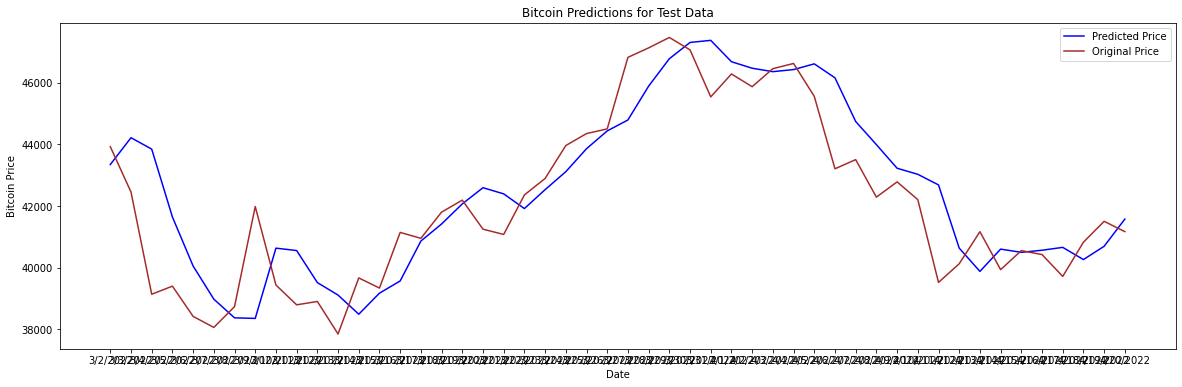

In [88]:
# Make predictions on test data
predicted_Price = regressor.predict(x_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
 
# Get the original price values for testing data
orig = y_test
orig = DataScaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
 
# Make line chart plotting predcited price and actual price
plt.plot(predicted_Price, color = 'blue', label = 'Predicted Price')
plt.plot(orig, color = 'brown', label = 'Original Price')
 
plt.title('Bitcoin Predictions for Test Data')
plt.xlabel('Date')
plt.xticks(range(TestingRecords), data.tail(TestingRecords)['Date'])
plt.ylabel('Bitcoin Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

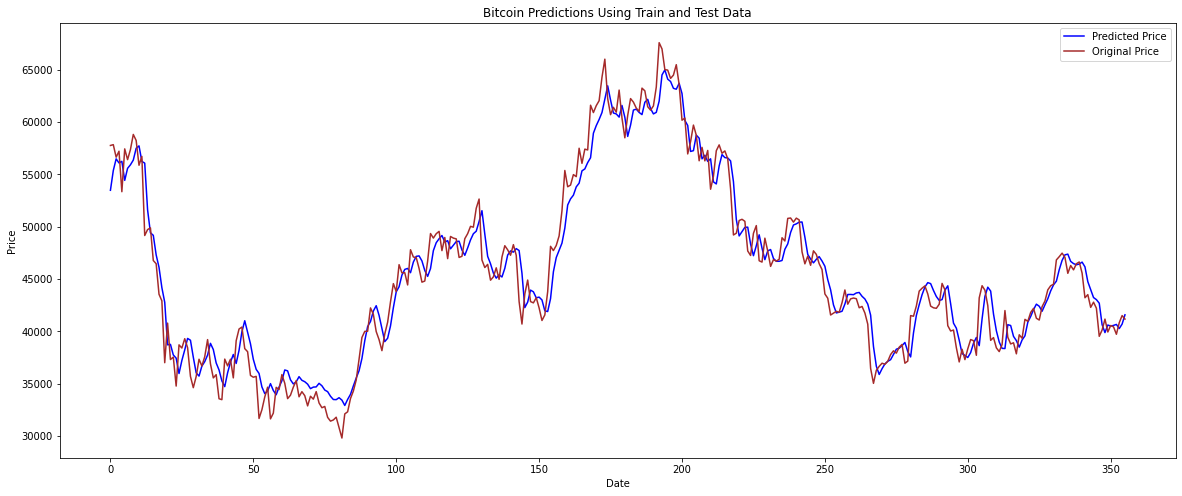

In [89]:
# Generate predictions on full data
trainp_pred = DataScaler.inverse_transform(regressor.predict(x_train))
test_pred = DataScaler.inverse_transform(regressor.predict(x_test))
 
all_pred = np.append(trainp_pred, test_pred)
all_data = all_data[time_steps:]
 
# Plot the full data
plt.plot(all_pred, color = 'blue', label = 'Predicted Price')
plt.plot(all_data , color = 'brown', label = 'Original Price')
 
 
plt.title('Bitcoin Predictions Using Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [28]:
# Last 10 days prices
Last10Days=np.array([1002.15, 1009.9, 1007.5, 1019.75, 975.4,
            1011.45, 1010.4, 1009,1008.25, 1017.65])
 
# Normalize the data 
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))
 

NumSamples=1
time_steps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,time_steps,NumFeatures)
 
#############################
 
# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[31579.21]], dtype=float32)